# Caracterização das Escolas

Nesta atividade, vamos realizar uma análise das escolas utilizando as variáveis **dependência administrativa** e **localização**. Nosso objetivo é construir tabelas de frequências absolutas e relativas para essas variáveis, e gerar gráficos representativos para cada uma. Além disso, faremos uma breve análise dos resultados obtidos.

O resultado final será um arquivo Word contendo todas as informações.

## Importação das Bibliotecas

Para essa análise, vamos utilizar as bibliotecas `pandas`, `numpy`, `matplotlib` e `docx`. Essas ferramentas nos ajudarão a carregar os dados, realizar os cálculos e gerar os gráficos e o documento final.

- `pandas`: para manipulação e análise de dados.
- `numpy`: para operações numéricas.
- `matplotlib`: para geração de gráficos.
- `docx`: para criação do relatório no formato Word.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches,Pt

In [2]:
df = pd.read_csv('microdados_ed_basica_2023.csv', encoding='windows 1252')
df = df[['TP_DEPENDENCIA','TP_LOCALIZACAO']]

In [3]:
df['TP_LOCALIZACAO'] = df['TP_LOCALIZACAO'].replace({1: 'Urbano', 2: 'Rural'})
df['TP_DEPENDENCIA'] = df['TP_DEPENDENCIA'].replace({
    1: 'Federal', 
    2: 'Estadual', 
    3: 'Municipal', 
    4: 'Privada'
})

## Construção da Tabela de Frequência

A seguir, calculamos a **frequência absoluta** e **frequência relativa** para cada combinação das variáveis `TP_DEPENDENCIA` e `TP_LOCALIZACAO`. Organizamos os dados em uma tabela, que será utilizada para análise e geração dos gráficos.

- **Frequência Absoluta**: número de ocorrências de cada categoria.
- **Frequência Relativa (%)**: porcentagem de cada categoria em relação ao total de escolas.

In [4]:
freq = df.value_counts().reset_index(name='FREQUENCIA_ABSOLUTA')

total = len(df)

freq['FREQUENCIA_RELATIVA'] = freq['FREQUENCIA_ABSOLUTA'] / total

freq['FREQUENCIA_RELATIVA (%)'] = (freq['FREQUENCIA_RELATIVA'] * 100).round(2)

freq.sort_values(by=['TP_DEPENDENCIA','TP_LOCALIZACAO'], inplace=True)

freq


,TP_DEPENDENCIA,TP_LOCALIZACAO,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA,FREQUENCIA_RELATIVA (%)
4,Estadual,Rural,6960,0.031982,3.20
3,Estadual,Urbano,26586,0.122164,12.22
7,Federal,Rural,97,0.000446,0.04
6,Federal,Urbano,628,0.002886,0.29
0,Municipal,Rural,65436,0.300682,30.07
1,Municipal,Urbano,65273,0.299933,29.99
5,Privada,Rural,970,0.004457,0.45
2,Privada,Urbano,51675,0.237450,23.74


## Gráfico de Frequência Relativa

Agora, geramos um gráfico de barras para visualizar a **frequência relativa** de cada categoria de `TP_DEPENDENCIA` por `TP_LOCALIZACAO` (urbano ou rural). O gráfico apresenta a distribuição percentual das escolas nas diferentes categorias.

- **Eixo X**: Tipos de dependência administrativa.
- **Eixo Y**: Frequência relativa (%) das escolas.
- Cada barra representa a porcentagem de escolas em cada categoria de `TP_LOCALIZACAO`.

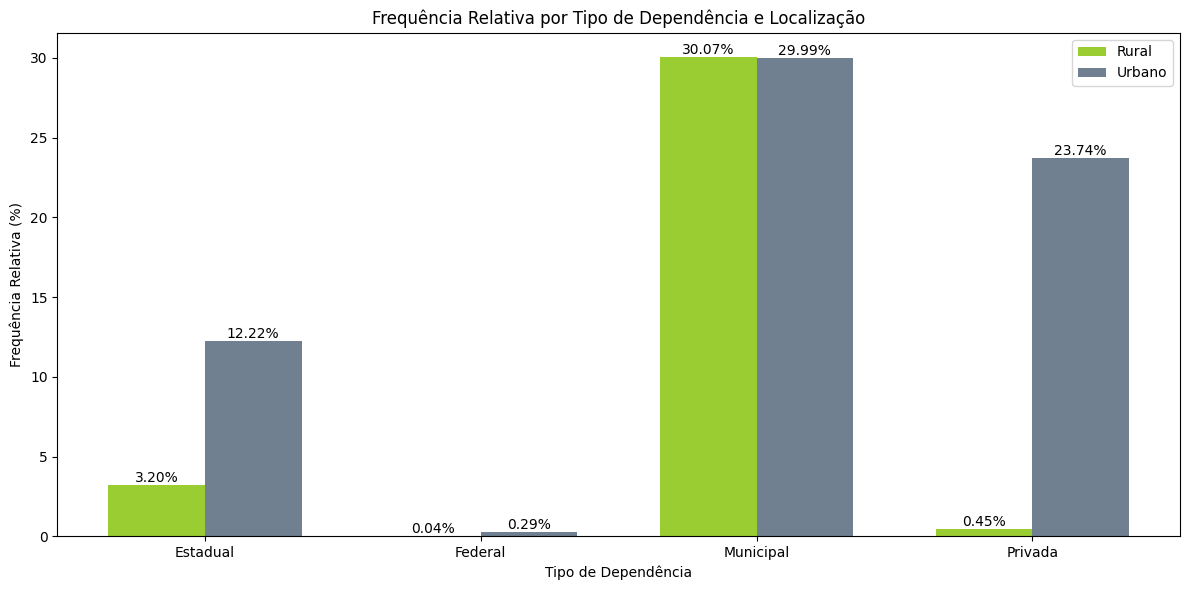

In [5]:
labels = freq['TP_DEPENDENCIA'].unique()
rural_values = freq[freq['TP_LOCALIZACAO'] == 'Rural']['FREQUENCIA_RELATIVA (%)'].values
urbano_values = freq[freq['TP_LOCALIZACAO'] == 'Urbano']['FREQUENCIA_RELATIVA (%)'].values


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, rural_values, width, label='Rural', color='yellowgreen')
bars2 = ax.bar(x + width/2, urbano_values, width, label='Urbano', color='slategray')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

ax.set_title('Frequência Relativa por Tipo de Dependência e Localização')
ax.set_xlabel('Tipo de Dependência')
ax.set_ylabel('Frequência Relativa (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
image_path_rel = 'frequencia_relativa.png'
plt.savefig(image_path_rel)
plt.show()

## Gráfico de Frequência Absoluta

Além da frequência relativa, também geramos um gráfico para visualizar a **frequência absoluta** de escolas em cada categoria. Este gráfico mostra o número real de escolas em cada combinação de `TP_DEPENDENCIA` e `TP_LOCALIZACAO`.

- **Eixo X**: Tipos de dependência administrativa.
- **Eixo Y**: Frequência absoluta das escolas.
- Como no gráfico anterior, as barras representam as escolas nas categorias urbano e rural.

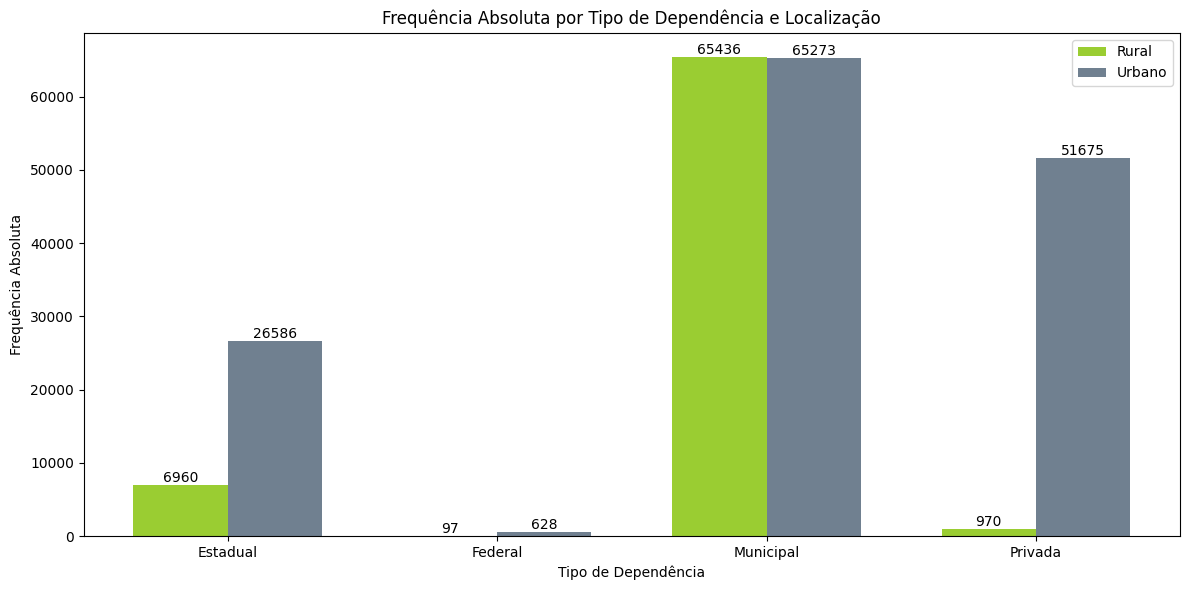

In [6]:
labels = freq['TP_DEPENDENCIA'].unique()
rural_values = freq[freq['TP_LOCALIZACAO'] == 'Rural']['FREQUENCIA_ABSOLUTA'].values
urbano_values = freq[freq['TP_LOCALIZACAO'] == 'Urbano']['FREQUENCIA_ABSOLUTA'].values


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, rural_values, width, label='Rural', color='yellowgreen')
bars2 = ax.bar(x + width/2, urbano_values, width, label='Urbano', color='slategray')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

ax.set_title('Frequência Absoluta por Tipo de Dependência e Localização')
ax.set_xlabel('Tipo de Dependência')
ax.set_ylabel('Frequência Absoluta')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()

image_path_abs = 'frequencia_absoluta.png'
plt.savefig(image_path_abs)
plt.show()


## Análise dos Resultados

Com base nas tabelas e gráficos gerados, podemos observar algumas tendências:
- As escolas **municipais** representam a maior parte das escolas, com destaque para as escolas **rurais** e **urbanas**.
- As escolas **privadas** estão majoritariamente concentradas em áreas **urbanas**.
- As escolas **federais** têm uma presença mínima, especialmente em áreas **rurais**.

Esses resultados sugerem que a maior parte das escolas estão sob a gestão municipal, e que as escolas federais têm uma presença limitada, principalmente nas áreas rurais.

## Geração do Relatório no Word

Após a análise e a construção dos gráficos, criamos um relatório em formato Word utilizando a biblioteca `python-docx`. O relatório inclui:
- Tabela de frequências.
- Gráficos gerados.
- Uma breve análise dos resultados.

O relatório será salvo no arquivo `caracterizacao_escolas.docx`.

In [7]:
doc = Document()
doc.add_heading('Caracterização das Escolas', level=0)
doc.add_heading('Tabela de Frequência', level=1)
table = doc.add_table(rows=1, cols=len(freq.columns), style='Light List Accent 1')

hdr_cells = table.rows[0].cells
for i, column in enumerate(freq.columns):
    hdr_cells[i].text = column

for index, row in freq.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

doc.add_heading('Gráficos de Frequência', level=1)
doc.add_heading('Gráfico de Frequência Relativa', level=2)
doc.add_picture(image_path_rel, width=Inches(6.4))
doc.add_heading('Gráfico de Frequência Absoluta', level=2)
doc.add_picture(image_path_abs, width=Inches(6.4))

doc.add_heading('Análise', level=1)

doc.add_paragraph("""
As duas categorias com maior quantidade de escolas são ‘Municipal Rural’ e ‘Municipal Urbana’, com 65.436 (30,07%) e 65.273 (29,99%) escolas, respectivamente. Outras categorias com presença significativa são as escolas 'Privadas Urbanas' com 51675 (23.74%) e 'Estaduais Urbanas' com 26586 (12.22), embora em quantidades inferiores às prévias.

\nAs escolas municipais somam 60,06% do total de escolas do estado de São Paulo, enquanto as escolas privadas representam 24,19%. As escolas estaduais correspondem a apenas 15,42%, e as escolas federais têm uma participação mínima de 0,33%.

\nA baixa representatividade de escolas federais (0,33%), especialmente quando se é comparado o cenário urbano (0,29%) ao rural (0,04%) e a frequência absoluta das escolas federais não igualizando a quantidade de escolas privadas rurais (a 3ª menor categoria), sugere uma presença limitada do governo federal em comparação a outros níveis de governo. Isso pode indicar uma falta de investimento ou de foco em políticas educacionais federais.

\nAlém disso, a discrepância significativa entre o número de escolas privadas em áreas rurais (0,45%) e em áreas urbanas (23,74%) pode ser uma reflexão da demanda, já que mais de 80% da população vive em áreas urbanas. No entanto, essa diferença não é tão pronunciada em outros tipos de dependência levantando a possibilidade de fatores mais relevantes incluem a diferença de renda e a disponibilidade de recursos entre áreas urbanas e rurais.

\nCom a exceção das escolas municipais (onde a diferença entre ambas as categorias é menos de 0.1%), em todas as categorias, o setor urbano possui uma dominância quando comparado com o setor rural, onde as categorias urbanas mais que o triplo de presença quando comparado ao setor rural.

\nComparando as frequências relativas entre o setor rural e urbano de cada categoria, a diferença mais significativa está no setor privado com uma proporção aproximada de 96% isso se dá pelo motivo de uma área urbana possuir mais recursos para providenciar locais de ensinos privados e mais específicos.

\nO setor estadual e federal também possui proporções aproximadas a favor do setor urbano, com uma diferença de 58% e 74% respectivamente, a dominância do setor Urbano em comparação ao Rural vem da Urbanização da capital de SP, que inflaciona os números a seu favor.
""")

doc.save('caracterizacao_escolas.docx')